In [31]:
import pickle
import re
from datetime import datetime
import numpy as np
randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [32]:
with open('movies2.pkl', 'r') as f:
    moviesdata = pickle.load(f)
years = range(1999, 2014)

In [33]:
md = moviesdata[moviesdata.title != ('Twin Sisters')]
md['gross'] = md['worldgross'] / md['theaters']
md['awarded'] = md['oscars'] > 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [34]:
md.head(5)

,nominations,oscars,theaters,title,worldgross,year,gross,awarded
0,3,0,3126,Star Wars: Episode I - The Phantom Menace,1027044677,1999-12-31,328549.160909,False
1,6,0,2821,The Sixth Sense,672806292,1999-12-31,238499.217299,False
2,1,0,3257,Toy Story 2,485015179,1999-12-31,148914.700338,False
3,1,0,3314,Austin Powers: The Spy Who Shagged Me,312016858,1999-12-31,94151.133977,False
4,4,4,2903,The Matrix,463517383,1999-12-31,159668.406132,True


In [35]:
x_dumb = []
for i in md['worldgross']:
    x_dumb.append(1)
md['x_dumb'] = x_dumb
md.head(5)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,nominations,oscars,theaters,title,worldgross,year,gross,awarded,x_dumb
0,3,0,3126,Star Wars: Episode I - The Phantom Menace,1027044677,1999-12-31,328549.160909,False,1
1,6,0,2821,The Sixth Sense,672806292,1999-12-31,238499.217299,False,1
2,1,0,3257,Toy Story 2,485015179,1999-12-31,148914.700338,False,1
3,1,0,3314,Austin Powers: The Spy Who Shagged Me,312016858,1999-12-31,94151.133977,False,1
4,4,4,2903,The Matrix,463517383,1999-12-31,159668.406132,True,1


In [36]:
md_lm = smf.ols(formula='worldgross ~ x_dumb', data=md).fit()
md_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             worldgross   R-squared:                      -0.010
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    -5.589
Date:                Tue, 05 May 2015   Prob (F-statistic):               1.00
Time:                        12:31:24   Log-Likelihood:                -11336.
No. Observations:                 543   AIC:                         2.268e+04
Df Residuals:                     541   BIC:                         2.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.35e+22   4.56e+21      2.964      0.003      4.55e+21  2.25e+22
x_dumb      -1.35e+22   4.56e+21     -2.964      0.003     -2.25e+22 -4.55e+21
==============================================================================
Omnibus:                      400.598   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6641.862
Skew:                           3.102   Prob(JB):                         0.00
Kurtosis:                      18.971   Cond. No.                     7.51e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


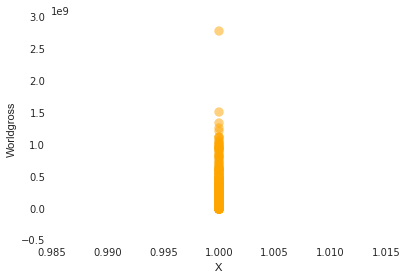

In [37]:
%pylab inline
plt.scatter(md['x_dumb'], md['worldgross'], alpha=0.5, s=80, color='orange')
plt.xlabel("X")
plt.ylabel("Worldgross")
plt.plot(md['x_dumb'], md_lm.params[0] + (md_lm.params[1] * md['x_dumb']), 'r', alpha=0.9)

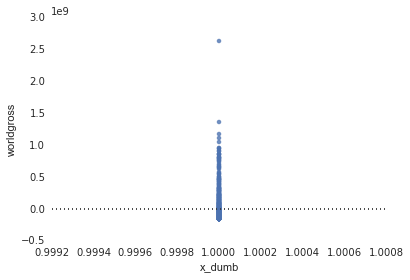

In [38]:
sns.residplot(md['x_dumb'], md['worldgross'])

## Challenge 2

In [39]:
md_lm = smf.ols(formula='worldgross ~ x_dumb + theaters', data=md).fit()
md_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             worldgross   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     567.7
Date:                Tue, 05 May 2015   Prob (F-statistic):           2.46e-86
Time:                        12:31:27   Log-Likelihood:                -11138.
No. Observations:                 543   AIC:                         2.228e+04
Df Residuals:                     541   BIC:                         2.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.499e+07   6.57e+06     -3.804      0.000     -3.79e+07 -1.21e+07
x_dumb     -2.499e+07   6.57e+06     -3.804      0.000     -3.79e+07 -1.21e+07
theaters    1.406e+05   5902.638     23.826      0.000      1.29e+05  1.52e+05
==============================================================================
Omnibus:                      535.972   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37154.280
Skew:                           4.159   Prob(JB):                         0.00
Kurtosis:                      42.661   Cond. No.                     5.90e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.73e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Populating the interactive namespace from numpy and matplotlib


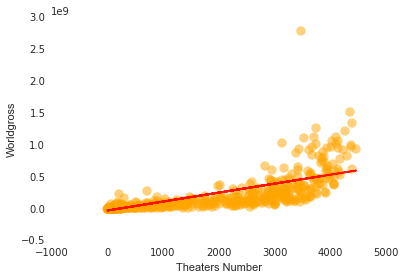

In [40]:
%pylab inline
plt.scatter(md['theaters'], md['worldgross'], alpha=0.5, s=80, color='orange')
plt.xlabel("Theaters Number")
plt.ylabel("Worldgross")
plt.plot(md['theaters'], md_lm.params[0] + (md_lm.params[2] * md['theaters']), 'r', alpha=0.9)

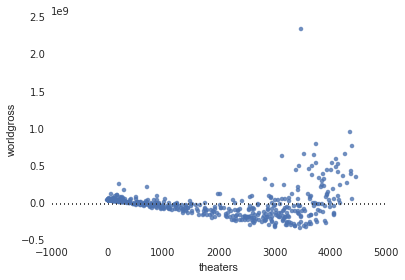

In [42]:
sns.residplot(md['theaters'], md['worldgross'])